# **Fraud Detection using Cost-Sensitive Logistic Regression**

In [1]:
Goal = """In this code I work on a credit card fraud detection using an imbalanced dataset. 
To better catch fraudulent transactions: I design a custom loss function that penalizes missing fraud more than misclassifying normal cases because this is more important 
Then I train a logistic-like model (with gradient descent) & track the learning progress over time (iterations)."""


## Data Preparation and Preprocessing

In [2]:
"""data source: https://drive.google.com/file/d/1NpxhnjwoRPtVEVtccFc3gteO9JdT1AhL/view"""
import pandas as pd

file = pd.read_csv(r"C:\Users\Maryam\Desktop\8th term\ML\E4.ML\creditcard.csv\creditcard.csv")


x=file.iloc[:,1:-1] # i didnt take the forst column (Time) because i thought it is'nt a feature
y=file.iloc[:,-1] #the ys are only 0 or 1 so this is classification

#splitting the train & test
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=np.array(x_train) #making it to the np.array format helps us work with it
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

#we need scaling to limit the ws
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Custom Cost Sensitive Loss Function

In [3]:
#this is a loss function that will differ the penalty of predicting 0 instead of 1 from 1 instead of 0
def loss(x,y,w):
    ypred=x@w
    loss1=np.sum((ypred/(y+1)-0.5*y)**2)
    return loss1

# this is needed for gd method
def gradloss(w,x,y):
    ypred=x@w
    grad=[]
    for i in range(29):
        grad.append(2*np.sum((ypred/(y+1)-0.5*y)*(x[:,i]/(y+1))))
    return np.array(grad)

## Gradient Descent Optimization

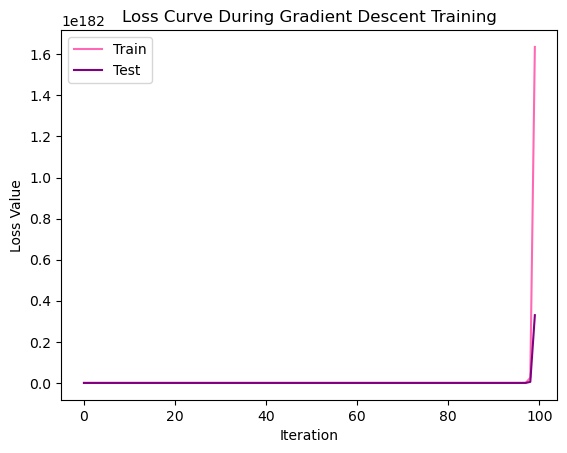

In [4]:
import matplotlib.pyplot as plt
def GD(x,y,η,iteration,x1,y1):
    LOSS_train=[]
    LOSS_test=[]
    w=np.random.rand(29)*0.01 #the matrice of w will be updated later
    for j in range(iteration):
        w-=η*gradloss(w,x,y) #GD formula : w=w-η*(dl/dw) #η=learning rate
        LOSS_train.append(loss(x,y,w))
        LOSS_test.append(loss(x1,y1,w))
    return w,LOSS_train,LOSS_test

loss_gd=GD(x_train,y_train,0.00001,100,x_test,y_test)
itr=[]
for i in range(100):
    itr.append(i)
plt.plot(itr,loss_gd[1],label="Train",color='hotpink') #LOSS_train
plt.plot(itr,loss_gd[2],label="Test",color="purple") #LOSS_test
plt.title("Loss Curve During Gradient Descent Training")
plt.xlabel("Iteration")
plt.ylabel("Loss Value")
plt.legend()
plt.show()